In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import euclidean

In [4]:
df = pd.read_csv(r'D:\AKG\Dataset\boids\boids_python2\dataframe50.csv')
df

,Time,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x45,y45,x46,y46,x47,y47,x48,y48,x49,y49
0,0.0,2433.959333,2295.271787,1911.466420,2218.606541,2371.209331,2414.992688,1775.124512,1651.118124,1553.225253,...,2005.164134,1730.627323,1773.610424,2374.937241,2394.998281,2160.898451,1917.766332,2144.997320,2425.032897,1674.556940
1,1.0,2436.619569,2296.658562,1910.076864,2221.265325,2371.611297,2417.965636,1777.923735,1652.197175,1550.450505,...,2003.296774,1728.279352,1775.766207,2377.023529,2397.992069,2160.705494,1915.503860,2143.027239,2422.036411,1674.411784
2,2.0,2439.444319,2297.668900,1908.547040,2223.845953,2371.887595,2420.952886,1780.833696,1652.926644,1547.675758,...,2001.634679,1725.781865,1778.729669,2377.490323,2400.920355,2161.357522,1913.268694,2141.026231,2419.039740,1674.270491
3,3.0,2442.171719,2298.918416,1906.863527,2226.329052,2372.014863,2423.950185,1783.794535,1653.409793,1544.901011,...,2000.434411,1723.032437,1781.158543,2375.729480,2403.541913,2162.816094,1911.061174,2138.994765,2416.043067,1674.129248
4,4.0,2444.955961,2300.035555,1905.063551,2228.729070,2372.031485,2426.950139,1786.610800,1654.443550,1542.126263,...,1999.056551,1720.367572,1783.245457,2373.574302,2403.627776,2165.814865,1908.880288,2136.934731,2413.046394,1673.988005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595.0,1811.104778,3745.457281,1775.789797,2723.323702,1570.610968,3992.982754,2100.458334,2264.623271,8542.250596,...,1037.905006,840.630589,1665.483399,3583.151540,1461.001825,3032.126958,1944.522465,2507.062093,1807.723593,680.347634
596,596.0,1810.003789,3748.247948,1774.458102,2726.011933,1569.180909,3995.619974,2101.900819,2267.253716,8539.475848,...,1035.596710,842.546776,1664.161108,3585.844409,1463.912523,3031.400435,1946.392976,2509.407555,1806.407836,677.651566
597,597.0,1808.902801,3751.038616,1773.126407,2728.700165,1567.750849,3998.257194,2103.692607,2269.659853,8536.701101,...,1033.288414,844.462962,1662.838816,3588.537278,1466.823222,3030.673912,1948.263486,2511.753016,1805.092080,674.955497
598,598.0,1807.801812,3753.829283,1771.794712,2731.388396,1566.320790,4000.894414,2105.487970,2272.063324,8533.926354,...,1030.980119,846.379149,1661.516524,3591.230147,1469.733920,3029.947390,1950.133996,2514.098478,1803.776323,672.259429


In [37]:
sequence_length = 7
# time_series_data = df['x0', 'y0']
time_series_data = df.iloc[:, 1:2].values

mean = np.mean(time_series_data, axis=0)
std = np.std(time_series_data, axis=0)
time_series_data_normalized = (time_series_data - mean) / std

In [38]:
X = []
y = []
for i in range(len(time_series_data_normalized) - sequence_length - 1):
    X.append(time_series_data_normalized[i:i+sequence_length])
    y.append(time_series_data_normalized[i+sequence_length+1])
X = np.array(X)
y = np.array(y)

split_index = int(0.8 * len(X))  # 80% training, 20% validation
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [49]:
X_val.shape, y.shape

((119, 7, 1), (592, 1))

In [29]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

X1, y1 = df_to_X_y(df, 5)
X1.shape, y1.shape

((595, 5, 1, 101), (595, 101))

In [81]:
model = Sequential()
model.add(LSTM(8, input_shape=(sequence_length, 1)))
# model.add(LSTM(256, return_sequences=True, input_shape=(sequence_length, 2)))
# model.add(Dense(32, activation='relu')) 
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 8)                 320       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
15/15 [==============================] - 2s 26ms/step - loss: 1.5679 - val_loss: 2.6616
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 1.2783 - val_loss: 2.5690
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 1.0295 - val_loss: 2.4597
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8123 - val_loss: 2.3269
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6324 - val_loss: 2.1734
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4872 - val_loss: 2.0145
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3712 - val_loss: 1.8480
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2822 - val_loss: 1.6852
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2104 - val_loss: 1.5203
Epoch 10/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1562 - val_loss: 1.3672
Epoch 11

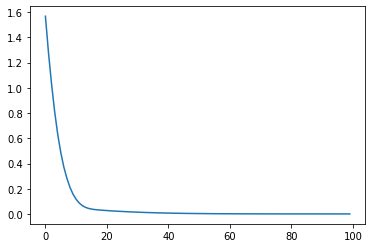

In [83]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [84]:
last_five_rows = time_series_data_normalized[-sequence_length:]
next_row_normalized = model.predict(np.expand_dims(last_five_rows, axis=0))
next_row = next_row_normalized * std + mean

print("Next Row Prediction:")
print(next_row)

1/1 [==============================] - 0s 358ms/step
Next Row Prediction:
[[1909.08068946]]


In [85]:
l5 = last_five_rows*std + mean

for i in range(0, len(l5)):
    print(l5[i])

next_row[0]

[1813.30675562]
[1812.20576688]
[1811.10477814]
[1810.0037894]
[1808.90280065]
[1807.80181191]
[1806.70082317]


array([1909.08068946])

In [86]:
threshold = 1
actual_row = time_series_data[-1]
euclidean_dist = euclidean(actual_row, next_row[0])
accuracy = int(euclidean_dist < threshold)

print("Accuracy Score:", accuracy)

Accuracy Score: 0


In [87]:
for i in range(0,5):
    print(X_val[i,6,]*std + mean)

[1938.8194723]
[1937.71848356]
[1936.61749482]
[1935.51650608]
[1934.41551733]


In [88]:
preds = model.predict(X_val)

4/4 [==============================] - 0s 1ms/step


In [89]:
preds.shape

(119, 1)

4/4 [==============================] - 0s 1ms/step


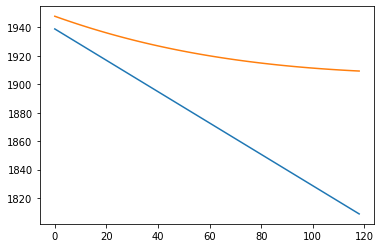

In [90]:
preds = model.predict(X_val)
plt.plot([i for i in range(0,119)], X_val[:,6,]*std + mean)
plt.plot([i for i in range(0,119)], preds*std + mean)

In [ ]:
for j in range(0,5):
    ids = []
    x_values = []
    y_values = []

    row = df.iloc[j]

    for i in range(1, len(row)):
        # ids.append(int(row[i][0]))
        x_values.append(float(row[i][1]))
        y_values.append(float(row[i][2]))

    plt.scatter(x_values, y_values)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Boids Plot')
    plt.show()